In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict

In [2]:
res1=pd.read_csv(r'res_wordnet_1.csv')
res2=pd.read_csv(r'res_wordnet_2.csv')
res3=pd.read_csv(r'res_wordnet_3.csv')
res4=pd.read_csv(r'res_wordnet_4.csv')
res5=pd.read_csv(r'res_wordnet_5.csv')

In [3]:
results=pd.concat([res1,res2,res3,res4,res5], ignore_index=True)

In [4]:
results=results.drop(['Unnamed: 0','Results'],axis=1)
results

,sentece,sense_polar,Truth
0,[CLS] One of the other reviewers has mentioned...,0.644919,0
1,[CLS] A wonderful little production. <br /><br...,0.302472,0
2,[CLS] I thought this was a wonderful way to sp...,0.276515,0
3,"[CLS] Petter Mattei's ""Love in the Time of Mon...",0.467679,0
4,"[CLS] Probably my all-time favorite movie, a s...",0.555961,0
...,...,...,...
2495,[CLS] Why is it that when a star reaches the t...,0.799679,1
2496,"[CLS] OK, before I get into this, let's go ahe...",0.688370,1
2497,"[CLS] Oh wow, the character shares my name fir...",0.791383,1
2498,[CLS] You know you're in trouble when the film...,1.301461,1


In [5]:
def create_df_for_cm(dataframe,break_point):
    res=[]
    for value in  dataframe['sense_polar']:
        if value < break_point:
            res.append(0)
        else :
            res.append(1)

    dataframe=dataframe.assign(Results= res)
    
    return dataframe


def confusion_matrix(df):
    import matplotlib.pyplot as plt
    import numpy
    from sklearn import metrics
    
    actual = df.Truth
    predicted =  df.Results

    confusion_matrix = metrics.confusion_matrix(actual, predicted)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

    cm_display.plot()
    return plt.show()

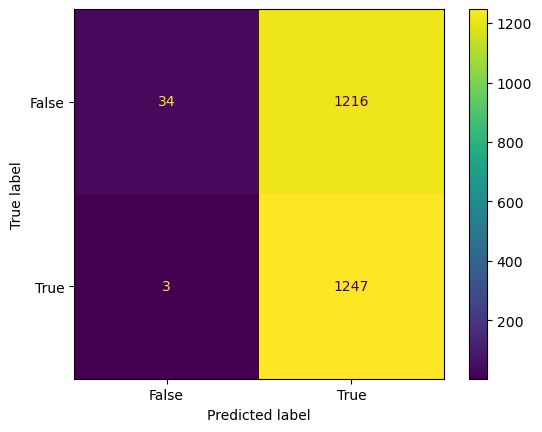

In [6]:
confusion_matrix(create_df_for_cm(results,0))

In [8]:
results=create_df_for_cm(results,0)

In [11]:
results

,sentece,sense_polar,Truth,Results
0,[CLS] One of the other reviewers has mentioned...,0.644919,0,1
1,[CLS] A wonderful little production. <br /><br...,0.302472,0,1
2,[CLS] I thought this was a wonderful way to sp...,0.276515,0,1
3,"[CLS] Petter Mattei's ""Love in the Time of Mon...",0.467679,0,1
4,"[CLS] Probably my all-time favorite movie, a s...",0.555961,0,1
...,...,...,...,...
2495,[CLS] Why is it that when a star reaches the t...,0.799679,1,1
2496,"[CLS] OK, before I get into this, let's go ahe...",0.688370,1,1
2497,"[CLS] Oh wow, the character shares my name fir...",0.791383,1,1
2498,[CLS] You know you're in trouble when the film...,1.301461,1,1


In [12]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
print(accuracy_score(results.Truth, results.Results))
print(precision_score(results.Truth, results.Results))
print(f1_score(results.Truth, results.Results))
print(recall_score(results.Truth, results.Results))

0.5124
0.5062931384490459
0.6716940479396714
0.9976
